<a href="https://colab.research.google.com/github/jeochris/DL-Lecture-Study/blob/main/TATA_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Stock Prices Prediction Using Keras Long Term Short Memory

https://github.com/mwitiderrick/stockprice

https://www.kdnuggets.com/2018/11/keras-long-short-term-memory-lstm-model-predict-stock-prices.html

In [10]:
# Part 1 - Data Preprocessing

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [11]:
# Importing the training set
from google.colab import files
uploaded = files.upload()

dataset_train = pd.read_csv('NSE-TATAGLOBAL.csv')
training_set = dataset_train.iloc[:, 1:2].values

Saving NSE-TATAGLOBAL.csv to NSE-TATAGLOBAL.csv


In [13]:
dataset_train.head()
# we want to predict stock price at certain time period
# intuitively, as time becomes closer, there will be higher correlation

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


In [16]:
# Feature Scaling - recommended!! -> improve performance
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [17]:
# Creating a data structure with 60 timesteps and 1 output -> input = from 60 previous days, output = current day's info
X_train = []
y_train = []
for i in range(60, 2035):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)
X_train

array([[0.6202352 , 0.62226277, 0.64436334, ..., 0.79622871, 0.81062449,
        0.74371452],
       [0.62226277, 0.64436334, 0.61719384, ..., 0.81062449, 0.74371452,
        0.77007299],
       [0.64436334, 0.61719384, 0.61820762, ..., 0.74371452, 0.77007299,
        0.73641525],
       ...,
       [0.19870235, 0.21796431, 0.21553122, ..., 0.14963504, 0.14801298,
        0.15815085],
       [0.21796431, 0.21553122, 0.20600162, ..., 0.14801298, 0.15815085,
        0.16504461],
       [0.21553122, 0.20600162, 0.21654501, ..., 0.15815085, 0.16504461,
        0.15896188]])

In [18]:
# Reshaping
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_train

array([[[0.6202352 ],
        [0.62226277],
        [0.64436334],
        ...,
        [0.79622871],
        [0.81062449],
        [0.74371452]],

       [[0.62226277],
        [0.64436334],
        [0.61719384],
        ...,
        [0.81062449],
        [0.74371452],
        [0.77007299]],

       [[0.64436334],
        [0.61719384],
        [0.61820762],
        ...,
        [0.74371452],
        [0.77007299],
        [0.73641525]],

       ...,

       [[0.19870235],
        [0.21796431],
        [0.21553122],
        ...,
        [0.14963504],
        [0.14801298],
        [0.15815085]],

       [[0.21796431],
        [0.21553122],
        [0.20600162],
        ...,
        [0.14801298],
        [0.15815085],
        [0.16504461]],

       [[0.21553122],
        [0.20600162],
        [0.21654501],
        ...,
        [0.15815085],
        [0.16504461],
        [0.15896188]]])

In [19]:
# Part 2 - Building the RNN

# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [20]:
# Initialising the RNN
regressor = Sequential() # -> will add LSTM layers

# Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
# input_shape = 60, output unit of LSTM = 50
# return_sequences = True -> output of LSTM becomes sequences involving history of input data set (if false -> output is just scalar)

regressor.add(Dropout(0.2))
# kind of regularization - avoid overfitting problem
# 20% of weight parameters into 0 each iteration

In [21]:
# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

In [22]:

# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

In [23]:
# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

# last LSTM connected to output: just scalar needed -> return_sequences = False

In [24]:
print(X_train.shape)

(1975, 60, 1)


In [25]:
print(y_train.shape)

(1975,)


In [26]:
# Adding the output layer
regressor.add(Dense(units = 1))

# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error') # no classification here!

# Fitting the RNN to the Training set
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)
# batch size decides the number of sub-samples to fit during NN
# when data set is too large -> fit with randomly selected 32 samples each epochs


Epoch 1/100
62/62 [==============================] - 19s 146ms/step - loss: 0.0108
Epoch 2/100
62/62 [==============================] - 9s 149ms/step - loss: 0.0031
Epoch 3/100
62/62 [==============================] - 10s 155ms/step - loss: 0.0026
Epoch 4/100
62/62 [==============================] - 11s 171ms/step - loss: 0.0026
Epoch 5/100
62/62 [==============================] - 10s 168ms/step - loss: 0.0022
Epoch 6/100
62/62 [==============================] - 10s 157ms/step - loss: 0.0023
Epoch 7/100
62/62 [==============================] - 10s 155ms/step - loss: 0.0023
Epoch 8/100
62/62 [==============================] - 9s 148ms/step - loss: 0.0022
Epoch 9/100
62/62 [==============================] - 9s 152ms/step - loss: 0.0020
Epoch 10/100
62/62 [==============================] - 9s 149ms/step - loss: 0.0016
Epoch 11/100
62/62 [==============================] - 9s 142ms/step - loss: 0.0017
Epoch 12/100
62/62 [==============================] - 9s 146ms/step - loss: 0.0017
Epoch 1

In [27]:
# Part 3 - Making the predictions and visualising the results

uploaded = files.upload()
# Getting the real stock price of 2017
dataset_test = pd.read_csv('tatatest.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values

Saving tatatest.csv to tatatest.csv


In [28]:
# Getting the predicted stock price of 2017
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
# Similar with train, use previous 60 as input
for i in range(60, 76):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
# predict function
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)


In [29]:
X_test.shape

(16, 60, 1)

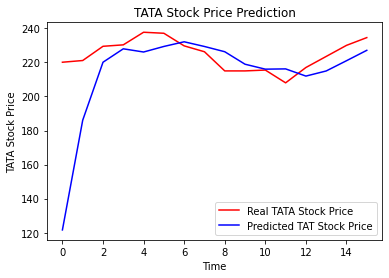

In [30]:
# Visualising the results
plt.plot(real_stock_price, color = 'red', label = 'Real TATA Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted TAT Stock Price')
plt.title('TATA Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('TATA Stock Price')
plt.legend()
plt.show()

# at beginning, NN is not so accurate, but as time goes on, gets better
# since beginning, we cant use sufficient previous info